In [1]:
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
modules_dir = os.path.join(os.path.dirname(notebook_dir), 'modules')

if modules_dir not in sys.path:
    sys.path.append(modules_dir)

from analysis import *
from get_data import *
from patent_descriptive import Patent_Descriptive

data_path = "../data"

## First Appear Analysis

Year
1837    9
1838    5
1839    1
1840    1
1841    1
       ..
2015    1
2016    1
2018    3
2020    1
2021    1
Length: 136, dtype: int64


x:\code\GunSafety_pkg\modules\patent_descriptive.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].astype(str)


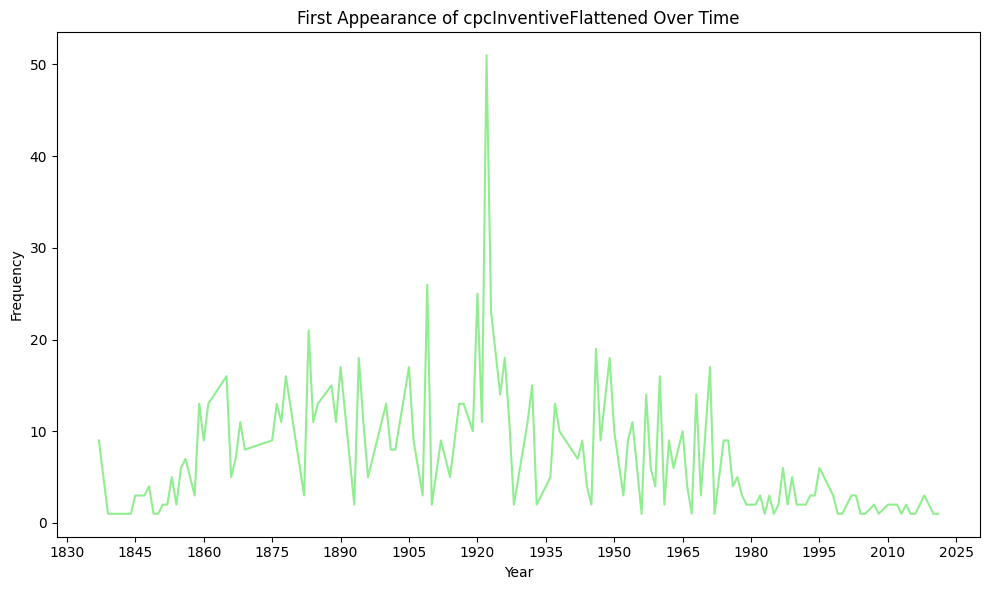

In [3]:
all_patents = get_patents()

data_01 = Patent_Descriptive(data = all_patents)
data_01.reformat()
data_01.data = data_01.separate_category(data = data_01.data)
F41 = data_01.data.loc[(data_01.data['category'] == 'F') & (data_01.data['subcategory1'] == '41')]
fa = data_01.first_appear(data = F41, target = 'cpcInventiveFlattened')

Year
1950    182
1952     90
1953    140
1954     69
1956     10
       ... 
2011    566
2012    469
2013    546
2014    697
2015    598
Length: 64, dtype: int64


x:\code\GunSafety_pkg\modules\patent_descriptive.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].astype(str)


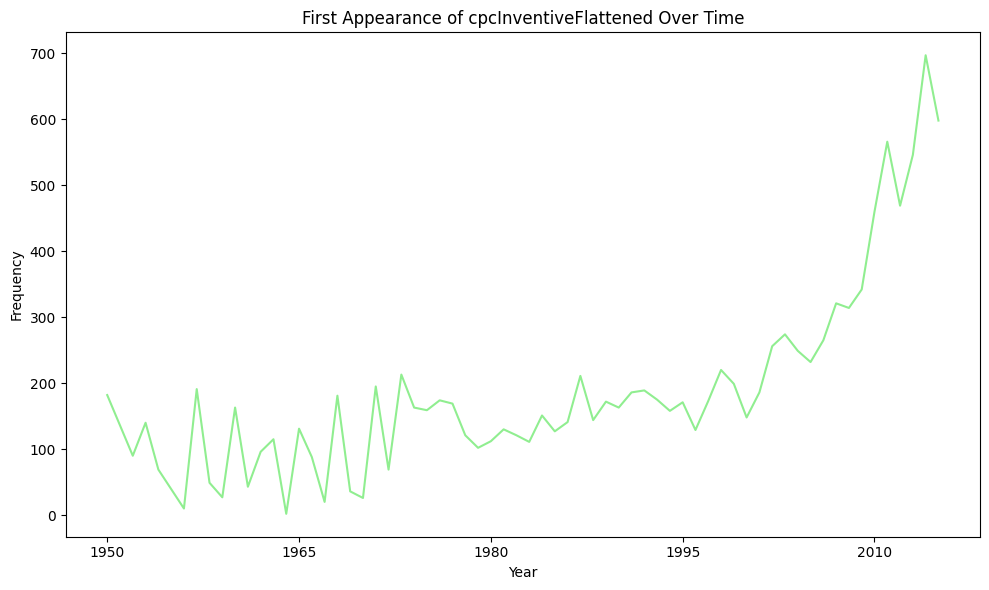

In [7]:
requirements = ("1950-01-01", "2015-12-31")
subsettede_patents = subset_patents("datePublished", requirements)
data_02 = Patent_Descriptive(data = subsettede_patents)
data_02.data = data_02.separate_category(data = data_02.data)
F41 = data_02.data.loc[(data_02.data['category'] == 'F') & (data_02.data['subcategory1'] == '41')]
fa = data_02.first_appear(data = F41, target = 'cpcInventiveFlattened')

## Temporal Dynamics analysis

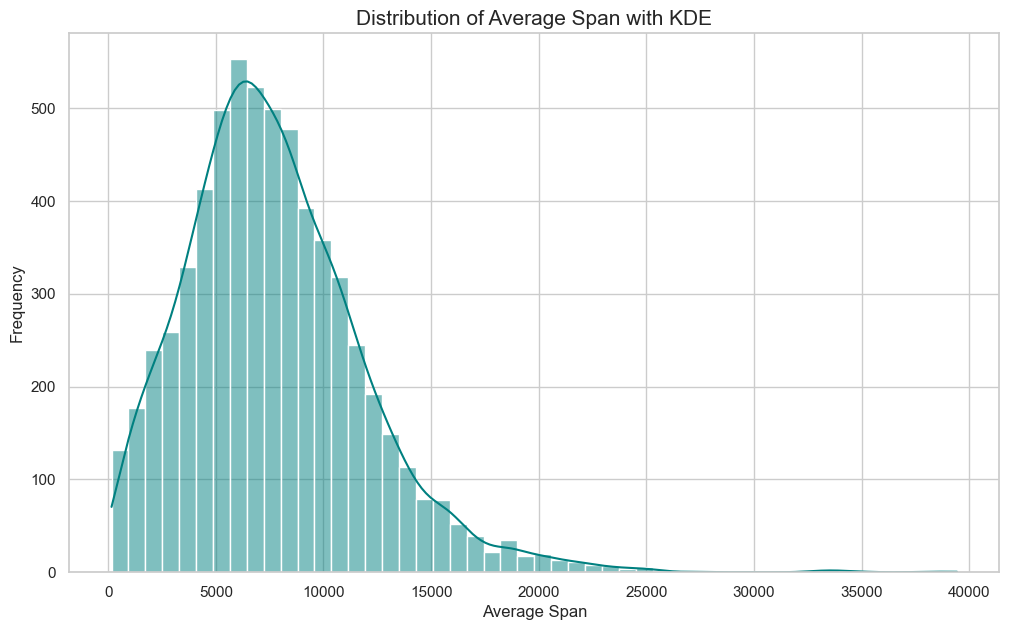

In [8]:
data_path = "../data"
# first_appear_analysis(data_path)
# compute_patent_citation_span(data_path)
plot_distribution_2(path_to_data=data_path, save=False)

In [6]:
# global df_basics
# global df_edge_list

# path_to_data="../data"
# df_edge_list = pd.read_csv(os.path.join(path_to_data, "raw/edge_list.csv"))
# df_basics = pd.read_csv(os.path.join(path_to_data, "raw/df_basics.csv"))
# dge_list = compute_edge_list(df_edge_list)
# average_span(path_to_data=path_to_data)
# # plot_distribution(path_to_data=path_to_data)
# plot_distribution_2(path_to_data=path_to_data)

## Network Analysis
Impossible to analyze everything, and from 30k to identify the important patents we can use, because of the references (unique feature)
What influences firearm innovation?

how: 2m --> Outside of F41

subsetting edge list
removing rows
adding edges


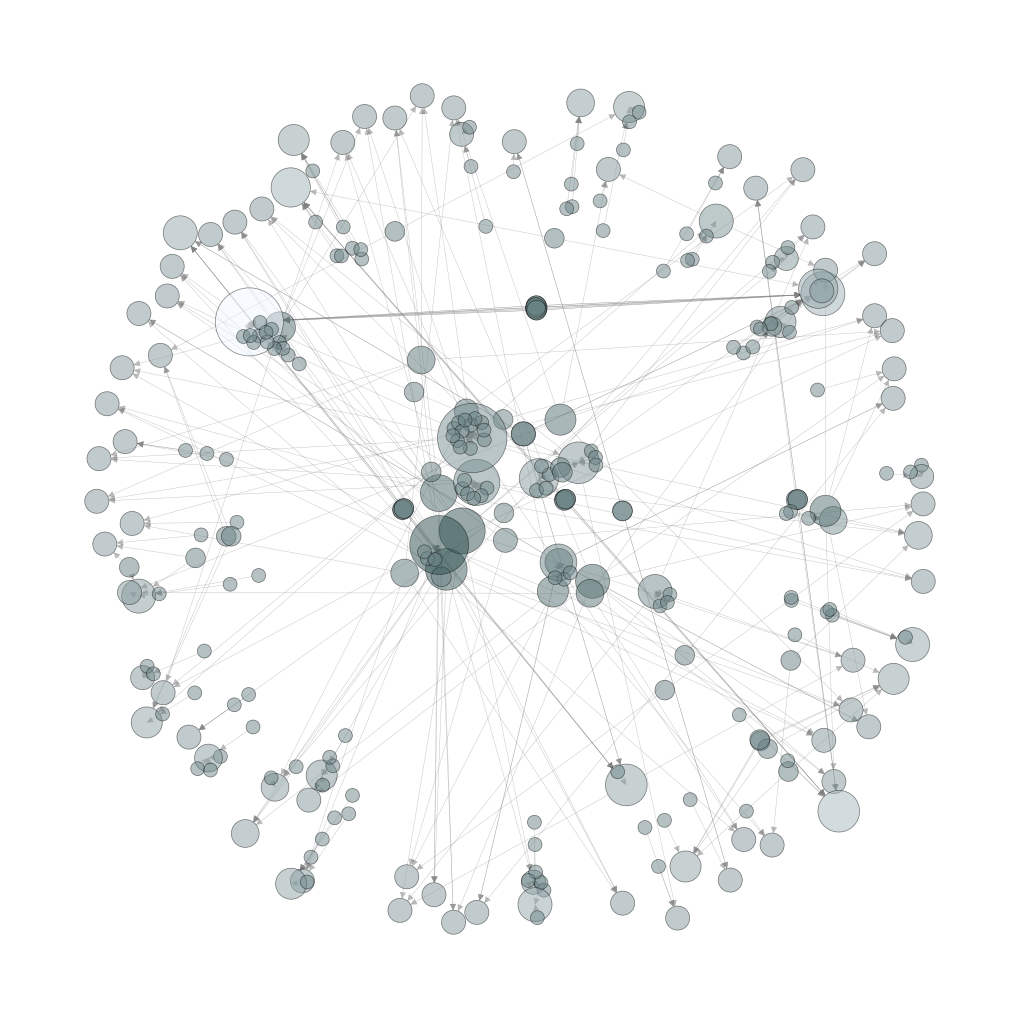

: 

In [9]:
# safety_df = pd.read_csv("../data/processed/fck2.csv")
# safety_df = safety_df[(safety_df['safe'] > 5) | (safety_df['security'] > 5) | (safety_df['secure'] > 0) | (safety_df['safety'] > 0)]

# ids = safety_df['guid'].values.tolist()

with open('../config.json') as f:
    ids = json.load(f)['network_id_02']

PLOT = network_plot()
PLOT.plot_network(ids)